<a href="https://colab.research.google.com/github/jiw3026/--/blob/main/HADRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# STEP 1. 패키지 설치
# ===============================
!pip install -q transformers datasets sentencepiece torchvision
!pip install -q git+https://github.com/openai/CLIP.git
!pip install -q accelerate

# ===============================
# STEP 2. 모델 불러오기 (BLIP-2, CLIP, ABSA)
# ===============================
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import CLIPProcessor, CLIPModel
from transformers import BertTokenizer, BertForSequenceClassification
from PIL import Image
import torch
import requests

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# BLIP-2: 텍스트-이미지 기반 응답 생성
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# CLIP: 이미지-응답 정합성 유사도 측정
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# ABSA: 감성 신뢰도 측정용 BERT 감정분류기 (5점 척도 기반)
absa_tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
absa_model = BertForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment").to(device)

print("모든 모델 로딩 완료!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

모든 모델 로딩 완료!


In [3]:
from PIL import Image
import requests

# 새 이미지 URL (안전한 음식 이미지)
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/A_small_cup_of_coffee.JPG/640px-A_small_cup_of_coffee.JPG"

# 이미지 로딩
image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
image.show()


In [4]:
from PIL import Image
import requests

# 새로운 샘플 이미지 (커피 사진)
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/A_small_cup_of_coffee.JPG/640px-A_small_cup_of_coffee.JPG"
image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# 사용자 프롬프트
prompt = "What do you think about this drink?"

# 응답 쌍
y_winner = "The coffee looks warm and aromatic, perfect for a relaxing morning."
y_loser = "This car's engine seems loud and outdated, not suitable for racing."

# 샘플 데이터 구성
sample_data = [{
    "image": image,
    "prompt": prompt,
    "y_winner": y_winner,
    "y_loser": y_loser
}]


In [5]:
# 보상함수
import torch.nn.functional as F

# CLIP 유사도 점수
def get_clip_score(image, text):
    inputs = clip_processor(images=image, text=[text], return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        img_emb = outputs.image_embeds
        txt_emb = outputs.text_embeds
    similarity = F.cosine_similarity(img_emb, txt_emb)
    return similarity.item()

# ABSA 감성 신뢰도
def get_absa_confidence(text):
    inputs = absa_tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = absa_model(**inputs)
        probs = torch.softmax(outputs.logits, dim=-1)
    return probs.max().item()

# 최종 보상 함수
def reward(image, text):
    return get_clip_score(image, text) * get_absa_confidence(text)


In [6]:
# ===============================
# STEP 4. 손실 함수 구현 (DPO + HAL)
# ===============================
# DPO 손실
def dpo_loss(r_winner, r_loser, beta=0.1):
    diff = beta * (r_winner - r_loser)
    return -torch.log(torch.sigmoid(torch.tensor(diff)))

# HAL 손실 (contrastive margin loss)
def hal_loss(y_positive, y_negative, margin=0.5):
    tok_pos = absa_tokenizer(y_positive, return_tensors="pt", truncation=True, padding=True).to(device)
    tok_neg = absa_tokenizer(y_negative, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        emb_pos = absa_model.bert(**tok_pos).last_hidden_state.mean(dim=1)
        emb_neg = absa_model.bert(**tok_neg).last_hidden_state.mean(dim=1)
    dist = torch.norm(emb_pos - emb_neg, p=2)
    return torch.relu(margin - dist)


In [8]:
# 수정된 학습 루프: 학습은 수행하지 않고 loss만 계산하여 출력
lambda_dpo = 1.0
lambda_hal = 1.0

for sample in sample_data:
    image = sample["image"]
    y_winner = sample["y_winner"]
    y_loser = sample["y_loser"]

    # 보상 계산
    r_win = reward(image, y_winner)
    r_los = reward(image, y_loser)

    # 손실 계산 (requires_grad 아님 → 학습 불가)
    loss_dpo = dpo_loss(r_win, r_los)
    loss_hal = hal_loss(y_winner, y_loser)
    total_loss = lambda_dpo * loss_dpo + lambda_hal * loss_hal

    # 학습 제거
    print(f"[Loss] DPO: {loss_dpo.item():.4f}, HAL: {loss_hal.item():.4f}, Total: {total_loss.item():.4f}")



[Loss] DPO: 0.6874, HAL: 0.0000, Total: 0.6874


In [9]:
# ===============================
# STEP 6. 성능 평가 및 정합성 분석
# ===============================
print("\n[성능 평가]")
for sample in sample_data:
    image = sample["image"]
    for key in ["y_winner", "y_loser"]:
        resp = sample[key]
        clip_sim = get_clip_score(image, resp)
        absa_conf = get_absa_confidence(resp)
        reward_val = clip_sim * absa_conf
        print(f"{key.upper()} | CLIP: {clip_sim:.4f} | ABSA: {absa_conf:.4f} | Reward: {reward_val:.4f}")



[성능 평가]
Y_WINNER | CLIP: 0.2948 | ABSA: 0.6938 | Reward: 0.2046
Y_LOSER | CLIP: 0.1785 | ABSA: 0.4997 | Reward: 0.0892


In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [3]:
!pip install transformers timm torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 129.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [5]:
from datasets import load_dataset

# MMIMDb 데이터셋 불러오기 (줄거리 + 장르 + 이미지 URL 포함)
mmimdb = load_dataset("sxj1215/mmimdb", split="train[:1000]")  # 1000개만 테스트


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/396 [00:00<?, ?B/s]

train-00000-of-00011.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00001-of-00011.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

train-00002-of-00011.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

train-00003-of-00011.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

train-00004-of-00011.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00005-of-00011.parquet:   0%|          | 0.00/563M [00:00<?, ?B/s]

train-00006-of-00011.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

train-00007-of-00011.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00008-of-00011.parquet:   0%|          | 0.00/529M [00:00<?, ?B/s]

train-00009-of-00011.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00010-of-00011.parquet:   0%|          | 0.00/511M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15552 [00:00<?, ? examples/s]

In [6]:
# 🎨 LAION Aesthetic 데이터셋 (텍스트 + 이미지 URL + 감성 점수)
laion = load_dataset("dclure/laion-aesthetics-12m-umap", split="train[:1000]")

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12096809 [00:00<?, ? examples/s]

In [7]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import requests

# Load CLIP model (openai pretrained)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def get_clip_score(image: Image.Image, text: str) -> float:
    inputs = clip_processor(text=[text], images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = clip_model(**inputs)
    score = outputs.logits_per_image.item()  # cosine similarity
    return score


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
from transformers import pipeline

# Load sentiment analysis pipeline (multi-language 1~5 stars)
sentiment_pipe = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def get_absa_confidence(text: str) -> float:
    result = sentiment_pipe(text)[0]
    label = result["label"]
    score = result["score"]

    if "1" in label or "2" in label:
        return 1 - score  # 부정
    elif "4" in label or "5" in label:
        return score      # 긍정
    else:
        return 0.5        # 중립 또는 애매


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [9]:
def compute_reward(image: Image.Image, response: str) -> float:
    clip_score = get_clip_score(image, response)
    absa_score = get_absa_confidence(response)
    reward = clip_score * absa_score
    return reward


In [10]:
from datasets import load_dataset
from PIL import Image
import torch
import torch.nn.functional as F
import torch.optim as optim
from transformers import CLIPProcessor, CLIPModel, pipeline
import matplotlib.pyplot as plt
import requests

# 데이터셋 불러오기
mmimdb = load_dataset("sxj1215/mmimdb", split="train[:1000]")
laion = load_dataset("dclure/laion-aesthetics-12m-umap", split="train[:1000]")

# 모델 불러오기
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
sentiment_pipe = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


Device set to use cpu


In [11]:
#보상함수 정의(CLIP+ABSA)
#  Sequence length must be less than max_position_embeddings  오류 발생으로 인해 토큰 조절 필요
def get_clip_score(image: Image.Image, text: str) -> float:
    # CLIP은 77 토큰 제한, 초과 시 자름
    truncated_text = text[:300]
    inputs = clip_processor(text=[truncated_text], images=image, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = clip_model(**inputs)
    return outputs.logits_per_image.item()

def get_absa_confidence(text: str) -> float:
    result = sentiment_pipe(text[:300])[0]  # ABSA도 너무 길지 않게 자름
    label = result["label"]
    score = result["score"]
    if "1" in label or "2" in label:
        return 1 - score
    elif "4" in label or "5" in label:
        return score
    return 0.5

def compute_reward(image: Image.Image, response: str) -> float:
    clip_score = get_clip_score(image, response)
    absa_score = get_absa_confidence(response)
    return clip_score * absa_score



In [12]:
#학습 샘플 구성

def get_sample(dataset, idx, mode="mmimdb"):
    sample = dataset[idx]
    if mode == "mmimdb":
        image = sample["images"][0]
        text = sample["messages"][0]["content"]
        plot = text.split("Plot:")[-1].split("Note")[0].strip()
        prompt = plot
        y_winner = prompt
        y_loser = "This phone has excellent battery life."
    else:
        image = Image.open(requests.get(sample["URL"], stream=True).raw).convert("RGB")
        prompt = sample["TEXT"]
        y_winner = prompt
        y_loser = "Nice grilled fish."
    return image, prompt, y_winner, y_loser



In [13]:
# HADRO-lite 평가 함수
# Confusion Matrix + Domain Gap 평가 함수
def evaluate_confusion_and_gap(dataset, mode="mmimdb", num_samples=500):
    y_true, y_pred, reward_gap_list = [], [], []
    for i in range(num_samples):
        try:
            image, _, y_win, y_lose = get_sample(dataset, i, mode)
            r_win = torch.tensor(compute_reward(image, y_win))
            r_lose = torch.tensor(compute_reward(image, y_lose))

            y_true.extend([1, 0])
            y_pred.extend([int(r_win > r_lose), int(r_lose > r_win)])
            reward_gap_list.append((r_win - r_lose).item())
        except Exception as e:
            print(f"[{mode.upper()}][{i}] Error: {e}")
    return y_true, y_pred, reward_gap_list


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Confusion Matrix 그리기 함수
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hallucination", "Correct"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix: {title}")
    plt.grid(False)
    plt.show()


[MMIMDb 평가 중...]


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (97143904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


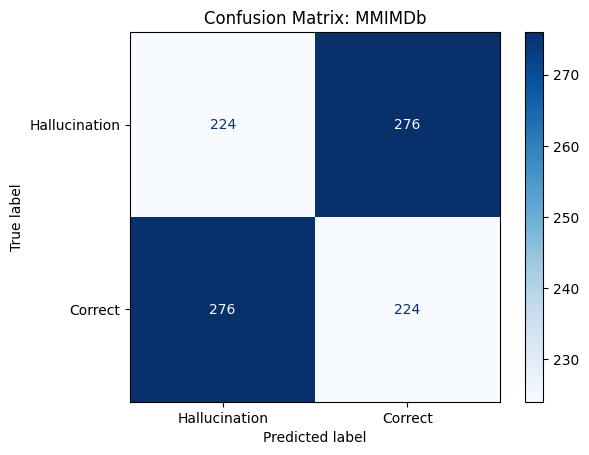

In [15]:
# MMIMDb 평가
print("[MMIMDb 평가 중...]")
y_true_mm, y_pred_mm, gap_mm = evaluate_confusion_and_gap(mmimdb, "mmimdb", 500)
plot_conf_matrix(y_true_mm, y_pred_mm, "MMIMDb")


[LAION 평가 중...]
[LAION][2] Error: HTTPSConnectionPool(host='www.mediaplaynews.com', port=443): Max retries exceeded with url: /wp-content/uploads/2020/11/last-christmas.png (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1016)')))
[LAION][4] Error: cannot identify image file <_io.BytesIO object at 0x7a62e029fba0>
[LAION][6] Error: cannot identify image file <_io.BytesIO object at 0x7a653b722e30>
[LAION][10] Error: cannot identify image file <_io.BytesIO object at 0x7a653b723330>
[LAION][14] Error: cannot identify image file <_io.BytesIO object at 0x7a653b722ca0>
[LAION][16] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0ac5e0>
[LAION][17] Error: cannot identify image file <_io.BytesIO object at 0x7a653b7238d0>
[LAION][25] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0ae700>
[LAION][30] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0ae7a0>
[LAION][33] Error: HTTPSConnect

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[LAION][251] Error: Exceeded 30 redirects.
[LAION][252] Error: cannot identify image file <_io.BytesIO object at 0x7a653b722020>
[LAION][253] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0c67f0>
[LAION][256] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0af3d0>
[LAION][257] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0c62a0>
[LAION][258] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0af3d0>
[LAION][261] Error: cannot identify image file <_io.BytesIO object at 0x7a62dbf866b0>
[LAION][264] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0c5580>
[LAION][272] Error: cannot identify image file <_io.BytesIO object at 0x7a653b793740>
[LAION][276] Error: cannot identify image file <_io.BytesIO object at 0x7a653b6ac360>
[LAION][277] Error: cannot identify image file <_io.BytesIO object at 0x7a653b7228e0>
[LAION][281] Error: cannot identify image file <_io.BytesIO object at 0x7a653b0ad3a0>
[LAION][289

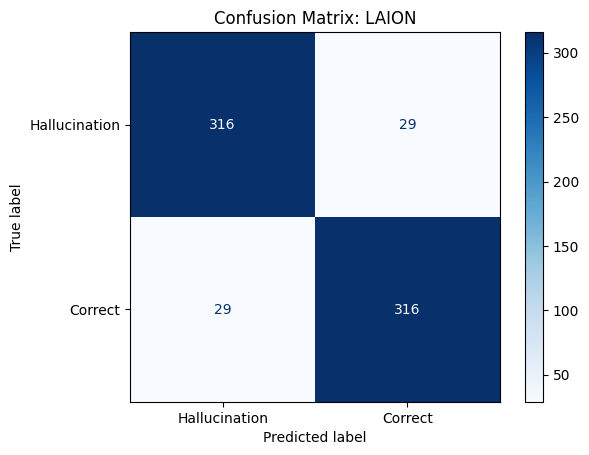

In [16]:
# LAION 평가
print("[LAION 평가 중...]")
try:
    y_true_la, y_pred_la, gap_la = evaluate_confusion_and_gap(laion, "laion", 500)
    plot_conf_matrix(y_true_la, y_pred_la, "LAION")
except Exception as e:
    print(f"[LAION 오류 발생] 평가를 일부 건너뜁니다: {e}")

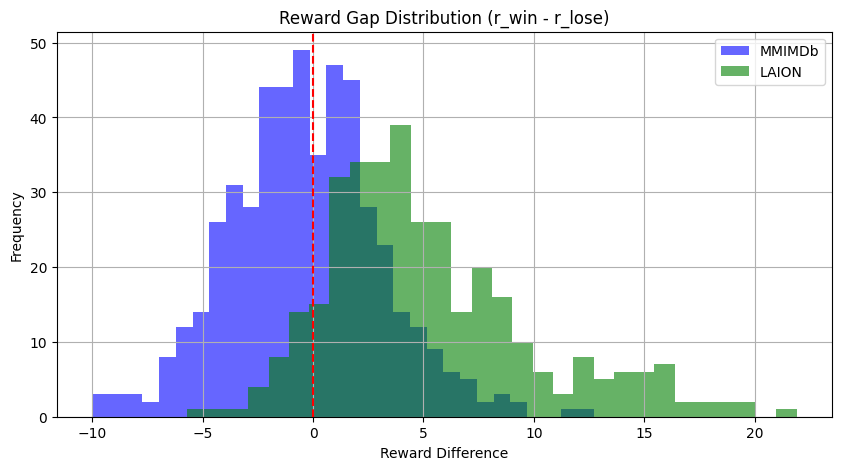

In [18]:
#Reward Gap Histogram + Domain Gap 확인
plt.figure(figsize=(10, 5))
plt.hist(gap_mm, bins=30, alpha=0.6, label="MMIMDb", color="blue")
plt.hist(gap_la, bins=30, alpha=0.6, label="LAION", color="green")
plt.axvline(0, color="red", linestyle="--")
plt.title("Reward Gap Distribution (r_win - r_lose)")
plt.xlabel("Reward Difference")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np

def print_gap_statistics(gap_list, label):
    gap_array = np.array(gap_list)
    print(f"\n📊 [{label}] Reward Gap 통계:")
    print(f" - 평균 (mean): {gap_array.mean():.4f}")
    print(f" - 표준편차 (std): {gap_array.std():.4f}")
    print(f" - 양수 비율 (r_win > r_lose): {(gap_array > 0).mean() * 100:.2f}%")

print_gap_statistics(gap_mm, "MMIMDb")
print_gap_statistics(gap_la, "LAION")



📊 [MMIMDb] Reward Gap 통계:
 - 평균 (mean): -0.3207
 - 표준편차 (std): 3.4290
 - 양수 비율 (r_win > r_lose): 44.80%

📊 [LAION] Reward Gap 통계:
 - 평균 (mean): 5.2002
 - 표준편차 (std): 4.7579
 - 양수 비율 (r_win > r_lose): 91.59%


In [20]:
#도메인 간 분포 차이 평가 (KS Test)
from scipy.stats import ks_2samp

ks_stat, ks_pval = ks_2samp(gap_mm, gap_la)
print("\n🧪 Kolmogorov–Smirnov Test (MMIMDb vs LAION)")
print(f" - KS 통계량: {ks_stat:.4f}")
print(f" - p-value: {ks_pval:.4f}")
if ks_pval < 0.05:
    print(" → 두 분포는 유의미하게 다릅니다 (p < 0.05)")
else:
    print(" → 두 분포는 유의미하게 다르지 않습니다")



🧪 Kolmogorov–Smirnov Test (MMIMDb vs LAION)
 - KS 통계량: 0.5230
 - p-value: 0.0000
 → 두 분포는 유의미하게 다릅니다 (p < 0.05)


In [22]:
#kl divergence
from scipy.special import rel_entr

# 공통 구간으로 히스토그램 정렬
hist_mm, bins = np.histogram(gap_mm, bins=30, range=(-1, 1), density=True)
hist_la, _     = np.histogram(gap_la, bins=bins, density=True)

# 정규화 + KL divergence 계산
p = np.clip(hist_mm, 1e-9, None)
q = np.clip(hist_la, 1e-9, None)

kl_div = np.sum(rel_entr(p, q))
print(f" KL Divergence (MMIMDb → LAION): {kl_div:.4f}")


 KL Divergence (MMIMDb → LAION): 86.7236


In [23]:
import matplotlib.pyplot as plt

def plot_dpo_vs_rewardgap(dpo_losses, reward_gaps, title="DPO Loss vs Reward Gap"):
    plt.figure(figsize=(7, 5))
    plt.scatter(reward_gaps, dpo_losses, alpha=0.6, color="purple")
    plt.axhline(y=0, color="gray", linestyle="--")
    plt.axvline(x=0, color="gray", linestyle="--")
    plt.xlabel("Reward Gap (r_win - r_lose)")
    plt.ylabel("DPO Loss")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Error processing sample 2: HTTPSConnectionPool(host='www.mediaplaynews.com', port=443): Max retries exceeded with url: /wp-content/uploads/2020/11/last-christmas.png (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1016)')))
Error processing sample 4: cannot identify image file <_io.BytesIO object at 0x7a6305463510>
Error processing sample 6: cannot identify image file <_io.BytesIO object at 0x7a652b1bb4c0>
Error processing sample 10: cannot identify image file <_io.BytesIO object at 0x7a653b4a1300>
Error processing sample 14: cannot identify image file <_io.BytesIO object at 0x7a653b3daf70>
Error processing sample 16: cannot identify image file <_io.BytesIO object at 0x7a653b175bc0>
Error processing sample 17: cannot identify image file <_io.BytesIO object at 0x7a653b10db70>
Error processing sample 25: cannot identify image file <_io.BytesIO object at 0x7a653b156d90>
Error processing sample 30: cannot identify image file <_io.

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error processing sample 251: Exceeded 30 redirects.
Error processing sample 252: cannot identify image file <_io.BytesIO object at 0x7a653b10db70>
Error processing sample 253: cannot identify image file <_io.BytesIO object at 0x7a62dbfccea0>
Error processing sample 256: cannot identify image file <_io.BytesIO object at 0x7a653b175bc0>
Error processing sample 257: cannot identify image file <_io.BytesIO object at 0x7a652b1d0450>
Error processing sample 258: cannot identify image file <_io.BytesIO object at 0x7a653b4691c0>
Error processing sample 261: cannot identify image file <_io.BytesIO object at 0x7a653b3b2020>
Error processing sample 264: cannot identify image file <_io.BytesIO object at 0x7a653b2e3b50>
Error processing sample 272: cannot identify image file <_io.BytesIO object at 0x7a653b2e3b00>
Error processing sample 276: cannot identify image file <_io.BytesIO object at 0x7a652b1bb420>
Error processing sample 277: cannot identify image file <_io.BytesIO object at 0x7a652b1bae80

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (97143904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Error processing sample 342: cannot identify image file <_io.BytesIO object at 0x7a652b1d31a0>
Error processing sample 343: cannot identify image file <_io.BytesIO object at 0x7a653b10d5d0>
Error processing sample 346: cannot identify image file <_io.BytesIO object at 0x7a653b469940>
Error processing sample 350: cannot identify image file <_io.BytesIO object at 0x7a652b1bb3d0>
Error processing sample 351: cannot identify image file <_io.BytesIO object at 0x7a652b1bb3d0>
Error processing sample 353: cannot identify image file <_io.BytesIO object at 0x7a652b1bb3d0>
Error processing sample 354: cannot identify image file <_io.BytesIO object at 0x7a653b468ae0>
Error processing sample 356: cannot identify image file <_io.BytesIO object at 0x7a653b10fd80>
Error processing sample 362: cannot identify image file <_io.BytesIO object at 0x7a653b107d80>
Error processing sample 366: cannot identify image file <_io.BytesIO object at 0x7a653b359120>
Error processing sample 368: HTTPConnectionPool(ho

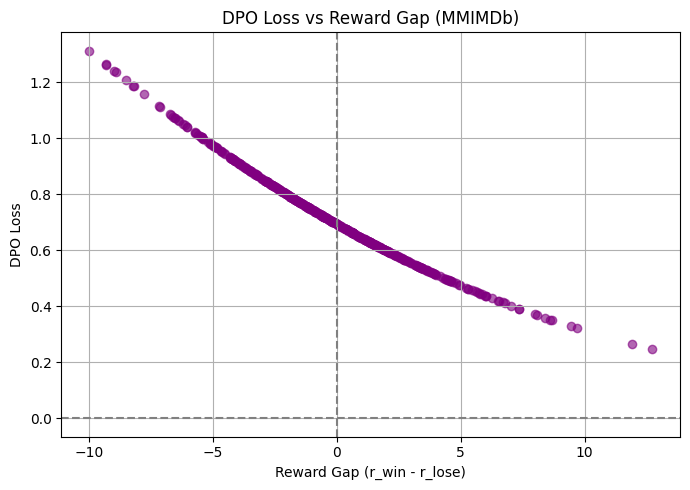

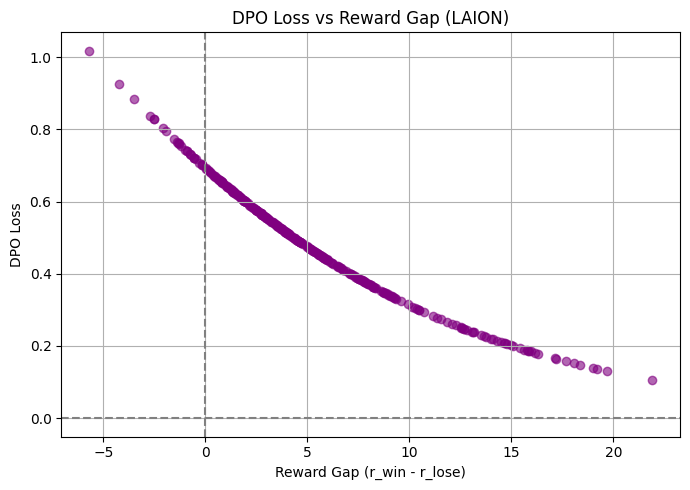

In [27]:
import numpy as np


def dpo_loss(r_winner, r_loser, beta=0.1):
    diff = beta * (r_winner - r_loser)
    return -torch.log(torch.sigmoid(torch.tensor(diff)))

# Calculate DPO Losses and reward gaps (example)
mm_dpo, la_dpo = [], []
mm_gap, la_gap = [], []

for i in range(500): # Or the desired number of samples
    try:
        # MMIMDb
        image_mm, _, y_win_mm, y_lose_mm = get_sample(mmimdb, i, "mmimdb")
        r_win_mm = compute_reward(image_mm, y_win_mm)
        r_lose_mm = compute_reward(image_mm, y_lose_mm)
        mm_dpo.append(dpo_loss(r_win_mm, r_lose_mm).item()) # Store DPO loss
        mm_gap.append(r_win_mm - r_lose_mm) # Store reward gap

        # LAION
        image_la, _, y_win_la, y_lose_la = get_sample(laion, i, "laion")
        r_win_la = compute_reward(image_la, y_win_la)
        r_lose_la = compute_reward(image_la, y_lose_la)
        la_dpo.append(dpo_loss(r_win_la, r_lose_la).item())
        la_gap.append(r_win_la - r_lose_la)
    except Exception as e:
        print(f"Error processing sample {i}: {e}")



# 실행
plot_dpo_vs_rewardgap(mm_dpo, mm_gap, "DPO Loss vs Reward Gap (MMIMDb)")
plot_dpo_vs_rewardgap(la_dpo, la_gap, "DPO Loss vs Reward Gap (LAION)")


In [28]:
def evaluate_dataset(dataset, mode="mmimdb", max_samples=500):
    dpo_losses, hal_losses, reward_gaps = [], [], []

    for i in range(max_samples):
        try:
            image, prompt, y_win, y_lose = get_sample(dataset, i, mode=mode)
            r_win = compute_reward(image, y_win)
            r_lose = compute_reward(image, y_lose)
            gap = r_win - r_lose
            reward_gaps.append(gap)

            # DPO Loss 계산
            beta = 1.0
            dpo_loss = -torch.log(torch.sigmoid(torch.tensor(beta * gap)))
            dpo_losses.append(dpo_loss.item())

            # HAL Loss 계산: 환각 거리 극대화 (임시 고정)
            hal_loss = max(0.0, 1 - abs(gap))
            hal_losses.append(hal_loss)

        except Exception as e:
            print(f"[{mode.upper()}][{i}] Error: {e}")
            continue

    return dpo_losses, hal_losses, reward_gaps

